In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import gc
import os

# Density Matrices

from quant_rotor.models.dense.density_matrix import density_matrix_1, density_matrix_2

# ED hamiltonian implementation.

# Dense (Slow)
from quant_rotor.core.dense.hamiltonian import hamiltonian_dense
from quant_rotor.core.dense.hamiltonian_big import hamiltonian_general_dense

# Sparse (Fast)
from quant_rotor.core.sparse.hamiltonian import hamiltonian_sparse
from quant_rotor.core.sparse.hamiltonian_big import hamiltonian_general_sparse

#Time propagated CCC

# Dense (Slow)
from quant_rotor.core.dense.de_solve_one_thermal import integration_scheme

# Sparse (Fast)
from quant_rotor.core.dense.de_solve_one_thermal_dense import integration_scheme as integration_scheme_fast

# Iterative CCC calculation

from quant_rotor.core.sparse.t_amplitudes_periodic_fast import t_periodic as t_periodic_sparse
from quant_rotor.core.dense.t_amplitudes_periodic_fast import t_periodic as t_periodic_dense

# CCC Time Propagation. (Energy graph)

In [18]:
site = 3
state = 9
g = 0.6

In [ ]:
beta_g1, t_0_dB_g1, t_1_max, t_2_max  = integration_scheme_dense(site, state, g, t_init=0, t_final=10,nof_points=10000)

In [19]:
beta_g1, t_0_dB_g1, t_1_max, t_2_max = integration_scheme(site, state, g, t_init=0, t_final=10,nof_points=10000)

In [ ]:
beta_g2, t_0_dB_g2, _, _  = integration_scheme(site, state, 2, t_init=0, t_final=10,nof_points=10000)

In [ ]:
beta_g4, t_0_dB_g4, _, _  = integration_scheme(site, state, 4, t_init=0, t_final=10,nof_points=10000)

In [ ]:
beta_g6, t_0_dB_g6, _, _  = integration_scheme(site, state, 6, t_init=0, t_final=10,nof_points=10000)

In [ ]:
beta_g8, t_0_dB_g8, _, _  = integration_scheme(site, state, 8, t_init=0, t_final=10,nof_points=10000)

In [6]:
cut = 40

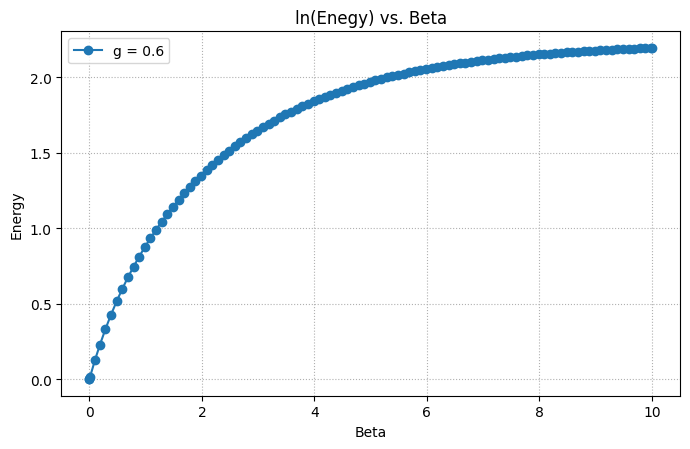

In [24]:
plt.figure(figsize=(7,4.6))
plt.plot(beta_g1[beta_g1 <= cut], t_0_dB_g1[beta_g1 <= cut], marker='o', label='g = 0.6')
# plt.plot(beta_g2, np.log(t_0_dB_g2), marker='o', label='g = 2')
# plt.plot(beta_g4, np.log(t_0_dB_g4), marker='o', label='g = 4')
# plt.plot(beta_g6, np.log(t_0_dB_g6), marker='o', label='g = 6')
# plt.plot(beta_g8, np.log(t_0_dB_g8), marker='o', label='g = 8')
plt.xlabel('Beta')
plt.ylabel('Energy')
plt.title(f'ln(Enegy) vs. Beta')
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
t_0_dB_g1

array([-0.            +0.j,  0.001349217533-0.j,  0.014755962229-0.j,  0.125504699428-0.j,  0.226296973046-0.j,  0.331823531021-0.j,  0.428148508933-0.j,  0.516686497109-0.j,  0.598564164609-0.j,  0.674684521091-0.j,  0.745776149071-0.j,  0.812431231465-0.j,  0.875135006161-0.j,  0.934288596232-0.j,  0.990226710871-0.j,  1.04323137843 -0.j,  1.093542614915-0.j,  1.141366728407-0.j,  1.186882800546-0.j,  1.23024776169 -0.j,  1.271600379856-0.j,  1.311064409126-0.j,  1.348751086139-0.j,  1.384761119554-0.j,  1.419186284015-0.j,  1.4521107046  -0.j,  1.483611898219-0.j,  1.513761623479-0.j,  1.542626578998-0.j,  1.570268981383-0.j,  1.5967470472  -0.j,  1.622115398019-0.j,  1.646425403539-0.j,  1.669725474581-0.j,  1.692061315312-0.j,  1.713476142068-0.j,  1.734010874706-0.j,  1.753704305141-0.j,  1.772593246878-0.j,  1.790712668543-0.j,  1.808095813875-0.j,  1.824774310182-0.j,  1.840778266866-0.j,  1.856136365367-0.j,  1.870875941634-0.j,  1.885023062019-0.j,  1.898602593384-0.j,  1.911

/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_92465/2135851667.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(beta_g1[beta_g1 <= 40], np.log(np.abs(-t_0_dB_g1 + t_0_dB_g1[beta_g1 <= 40][-1]))[beta_g1 <= 40], marker='o', label='g = 0.8')


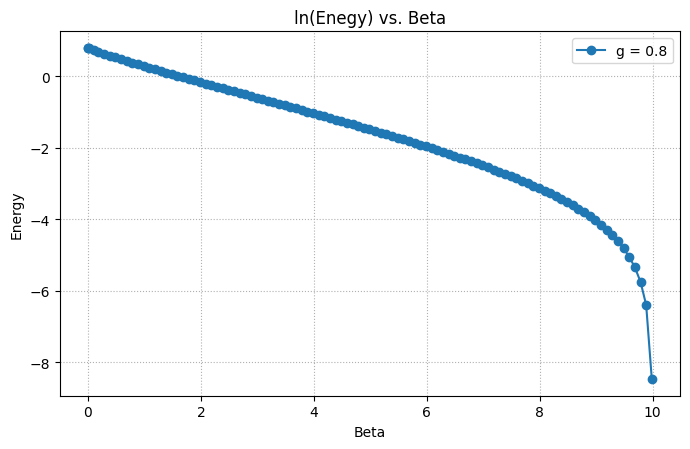

In [23]:
plt.figure(figsize=(7,4.6))
plt.plot(beta_g1[beta_g1 <= 40], np.log(np.abs(-t_0_dB_g1 + t_0_dB_g1[beta_g1 <= 40][-1]))[beta_g1 <= 40], marker='o', label='g = 0.8')
# plt.plot(beta_g2, np.log(t_0_dB_g2), marker='o', label='g = 2')
# plt.plot(beta_g4, np.log(t_0_dB_g4), marker='o', label='g = 4')
# plt.plot(beta_g6, np.log(t_0_dB_g6), marker='o', label='g = 6')
# plt.plot(beta_g8, np.log(t_0_dB_g8), marker='o', label='g = 8')
plt.xlabel('Beta')
plt.ylabel('Energy')
plt.title(f'ln(Enegy) vs. Beta')
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

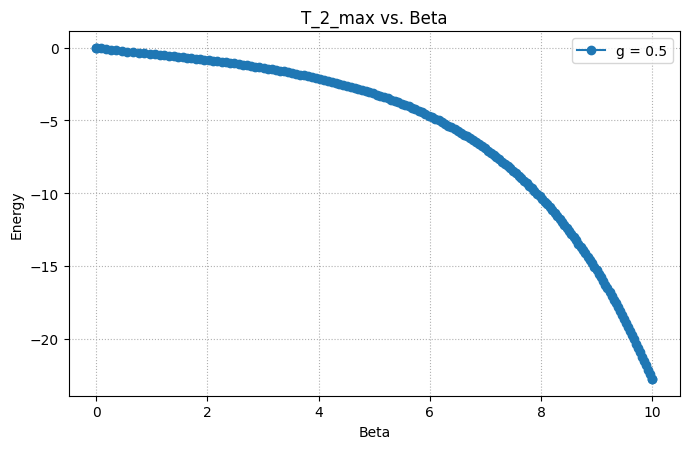

In [10]:
plt.figure(figsize=(7,4.6))
plt.plot(beta_g1[beta_g1 <= 40], t_2_max[beta_g1 <= 40], marker='o', label='g = 0.5')
plt.xlabel('Beta')
plt.ylabel('Energy')
plt.title(f'T_2_max vs. Beta')
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.min(-t_0_dB_g1)

# Hamiltonian memory and time constraints.

## Time

In [ ]:
def time_once(fn, *args, **kwargs):
    """Time a single call to fn(*args, **kwargs)."""
    start = time.perf_counter()
    out = fn(*args, **kwargs)
    elapsed = time.perf_counter() - start
    return elapsed, out

def median_time(fn, *args, repeats=3, **kwargs):
    """Run fn multiple times, return median wall time (seconds)."""
    times = []
    for _ in range(repeats):
        gc.collect()
        t, _ = time_once(fn, *args, **kwargs)
        times.append(t)
    return float(np.median(times))

def bench_function_across_sites(builder_fn, sites_list, state, g, repeats=3, warmup=True):
    """Return list of times (seconds) for each sites in sites_list."""
    results = []
    for s in sites_list:
        if warmup:
            try:
                _ = builder_fn(state, s, g)
            except Exception:
                # If your builder returns (H, K, V), that’s fine; we don't use it here
                pass
        t = median_time(builder_fn, state, s, g, repeats=repeats)
        results.append(t)
        print(f"{builder_fn.__name__}: sites={s:>3}  time={t:.3f} s")
    return results

In [ ]:
state = 3          # keep constant while sweeping sites
g = 1.0            # coupling to use in all runs
sites_list_d = np.arange(2, 11)
sites_list_d_2 = np.arange(2, 7)
sites_list_s = np.arange(2, 15)
sites_list_s_2 = np.arange(2, 7)
repeats = 1        # number of timings per point; median is reported
warmup = False

In [ ]:
times_dense_3  = bench_function_across_sites(hamiltonian_dense,  sites_list_d, 3, g, repeats=repeats, warmup=warmup)

In [ ]:
times_sparse_3 = bench_function_across_sites(hamiltonian_sparse, sites_list_s, 3, g, repeats=repeats, warmup=warmup)

In [ ]:
times_dense_5  = bench_function_across_sites(hamiltonian_dense,  sites_list_d_2, 5, g, repeats=repeats, warmup=warmup)

In [ ]:
times_sparse_5 = bench_function_across_sites(hamiltonian_sparse, sites_list_s_2, 5, g, repeats=repeats, warmup=warmup)

In [ ]:
plt.figure(figsize=(7,4.5))
plt.plot(sites_list_s, times_sparse_3, marker='o', label='hamiltonian_sparse 3 states')
plt.plot(sites_list_d, times_dense_3,  marker='s', label='hamiltonian_dense 3 states')
plt.plot(sites_list_s_2, times_sparse_5, marker='o', label='hamiltonian_sparse 11 states')
plt.plot(sites_list_d_2, times_dense_5,  marker='s', label='hamiltonian_dense 11 states')
plt.xlabel('Number of sites')
plt.ylabel('Time to build Hamiltonian (s)')
plt.title(f'Build time vs. sites (state={state}, g={g}, repeats={repeats})')
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

## Memory

In [ ]:
def plot_memory_vs_sites(states, sites_list, *, bytes_per_value=8, bytes_per_nz=24,
                         sparse_formula="local", logy=True):
    """
    Plot memory M (GB) vs number of sites for fixed `states`.

    Parameters
    ----------
    states : int
        Local Hilbert-space size per site.
    sites_list : list[int]
        Sites to evaluate (e.g., range(2, 15)).
    bytes_per_value : int
        Bytes per scalar (8 for float64/complex128 real part; adjust if needed).
    bytes_per_nz : int
        Approximate bytes per nonzero in CSR/CSC (~24 bytes typical).
    sparse_formula : {"local", "screenshot"}
        - "local":  nnz ≈ (2*states - 2)^2 * states**(sites - 2)
                    (nearest-neighbour two-body on a chain; per-site local rule)
        - "screenshot": Msparse(states^sites) = 24*(2*sqrt(states^sites) - 2)^2 * states**(sites - 2) / 1024^3
                        (matches your slide formula literally)
    logy : bool
        Use log scale on y-axis.
    """
    sites_arr = np.array(list(sites_list), dtype=np.float64)

    # Dense memory (GB): 8*(N^2)/1024^3 with N = states**sites
    N = states ** sites_arr
    M_dense_GB = (bytes_per_value * (N**2)) / (1024**3)

    # Sparse memory (GB)
    if sparse_formula == "local":
        # nnz per row ~ (2*states-2)^2, number of blocks ~ states**(sites-2)
        nnz = ((2*states - 2)**2) * (states ** (sites_arr - 2))
        M_sparse_GB = (bytes_per_nz * nnz) / (1024**3)
    elif sparse_formula == "screenshot":
        # your slide’s expression (uses sqrt(N))
        M_sparse_GB = (24.0 * (2*np.sqrt(N) - 2.0)**2 * (states**(sites_arr - 2))) / (1024**3)
    else:
        raise ValueError("sparse_formula must be 'local' or 'screenshot'")

    # Plot
    plt.figure(figsize=(7,4.6))
    plt.plot(sites_arr, np.abs(M_dense_GB), marker='o', label='Dense')
    plt.plot(sites_arr, np.abs(M_sparse_GB), marker='s', label='Sparse')
    if logy:
        plt.yscale('log')
    plt.xlabel('Number of sites')
    plt.ylabel('log of Memory (GB)')
    plt.title(f'Memory vs. sites  (states = {states})')
    plt.grid(True, which='both', linestyle=':', linewidth=0.8)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return sites_arr, M_dense_GB, M_sparse_GB

In [ ]:
states = 20
sites = range(2, 10)  # 2..12
sites, dense, sparse = plot_memory_vs_sites(states, sites, sparse_formula="local", logy=False)        # nearest-neighbour local rule
# or to match your slide exactly:
# plot_memory_vs_sites(states, sites, sparse_formula="screenshot")

# Density matrix occupation difference with g

In [ ]:
def load_one_simulation_ED(sites: int, states: int, g: float, directory: str = ".") -> dict:
    """
    Loads eigenvalues, eigenvectors, and NO basis matrix for a specific (sites, states, g) system.

    Returns a dictionary with 'eigvals', 'eigvecs', and 'NO_basis'.
    """
    g_str = f"{g:.1f}"
    base = f"sites{sites}_states{states}_g{g_str}"

    eigvals_path = os.path.join(directory, f"eigvals_{base}.npy")
    eigvecs_path = os.path.join(directory, f"eigvecs_{base}.npy")

    try:
        eigvals = np.load(eigvals_path)
        eigvecs = np.load(eigvecs_path)

        return eigvals, eigvecs

    except FileNotFoundError as e:
        print(f"[Error] Missing file for (sites={sites}, states={states}, g={g_str}): {e}")
        return None

In [ ]:
def load_one_simulation_NO(sites: int, states: int, g: float, directory: str = ".") -> dict:
    """
    Loads eigenvalues, eigenvectors, and NO basis matrix for a specific (sites, states, g) system.

    Returns a dictionary with 'eigvals', 'eigvecs', and 'NO_basis'.
    """
    g_str = f"{g:.1f}"
    base = f"sites{sites}_states{states}_g{g_str}"

    eigvals_path = os.path.join(directory, f"NO_eigvals_{base}.npy")
    eigvecs_path = os.path.join(directory, f"NO_eigvecs_{base}.npy")
    NO_basis_path = os.path.join(directory, f"NO_basis_{base}.npy")

    try:
        eigvals = np.load(eigvals_path)
        eigvecs = np.load(eigvecs_path)
        NO_basis = np.load(NO_basis_path)

        return eigvals, eigvecs, NO_basis

    except FileNotFoundError as e:
        print(f"[Error] Missing file for (sites={sites}, states={states}, g={g_str}): {e}")
        return {}

In [ ]:
def scatter_and_fit(g, y, label, color, degree=10, visible_indices=None):
    """
    Plot selected points from (g, y), fit to full data, and draw the fit curve.

    Parameters:
        g, y: full data arrays
        label: label for legend
        color: color for plot
        degree: degree of polynomial fit
        visible_indices: indices of points to show in the scatter plot
    """
    g = np.asarray(g)
    y = np.asarray(y)

    if visible_indices is not None:
        g_visible = g[visible_indices]
        y_visible = y[visible_indices]
    else:
        g_visible = g
        y_visible = y

    # Show only selected data points
    plt.scatter(g_visible, y_visible, label=f"{label}", color=color, s=30)

    # Fit to full data
    coeffs = np.polyfit(g, y, degree)
    poly_fn = np.poly1d(coeffs)

    # Plot fitted polynomial
    g_smooth = np.linspace(g.min(), g.max(), 300)
    y_smooth = poly_fn(g_smooth)
    plt.plot(g_smooth, y_smooth, linestyle='--', color=color)

In [ ]:
def scatter_and_fit_4(g, y, label, color, degree=10, visible_indices=None, ax=None):
    """
    Plot selected points from (g, y), fit to full data, and draw the fit curve.

    Parameters
    ----------
    g, y : array-like
        Data arrays.
    label : str
        Label for legend or subplot title.
    color : str
        Color for plot.
    degree : int, optional
        Degree of polynomial fit (default=10).
    visible_indices : array-like, optional
        Indices of points to show in the scatter plot.
    ax : matplotlib.axes.Axes, optional
        Axis to plot on (if None, uses current axis).
    """
    import numpy as np
    import matplotlib.pyplot as plt

    if ax is None:
        ax = plt.gca()

    g = np.asarray(g)
    y = np.asarray(y)

    if visible_indices is not None:
        g_visible = g[visible_indices]
        y_visible = y[visible_indices]
    else:
        g_visible = g
        y_visible = y

    # Scatter visible points
    ax.scatter(g_visible, y_visible, label=label, color=color, s=30)

    # Fit to full data
    coeffs = np.polyfit(g, y, degree)
    poly_fn = np.poly1d(coeffs)

    # Plot fitted polynomial
    g_smooth = np.linspace(g.min(), g.max(), 300)
    y_smooth = poly_fn(g_smooth)
    ax.plot(g_smooth, y_smooth, linestyle='--', color=color)

In [ ]:
file_path_ED = "./quant_rotor/data/ED_analisis_data"
file_path_ED_s = "./quant_rotor/dataED_analisis_data_sparce"
file_path_T_amplitudes = "./quant_rotor/dataT_amplitudes_energy"

In [ ]:
si3_st11_ED = np.zeros((4, 51))
si3_st5_NO = np.zeros((4, 51))
si5_st5_NO = np.zeros((4, 51))
si7_st3_NO = np.zeros((4, 51))
g_array = np.zeros((51))

In [ ]:
for g_index in range(1, 51):
    g = g_index / 10
    g_array[g_index] = g

    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    index_array = np.argmin(eig_val)
    ground_state_vec = eig_vec[:, index_array]

    D_1 = density_matrix_1(11, 3, ground_state_vec, 0)
    D_2 = density_matrix_2(11, 3, ground_state_vec, 0, 1)

    eig_val_D_1, eig_vec_D_1 = np.linalg.eigh(D_1)
    eig_val_D_2, eig_vec_D_2 = np.linalg.eigh(D_2.reshape(11**2, 11**2))

    indx_1 = np.argsort(-eig_val_D_1)
    indx_2 = np.argsort(-eig_val_D_2)

    si3_st11_ED[0, g_index] = eig_val_D_1[indx_1[0]]
    si3_st11_ED[1, g_index] = eig_val_D_1[indx_1[1]]
    si3_st11_ED[2, g_index] = eig_val_D_2[indx_2[0]]
    si3_st11_ED[3, g_index] = eig_val_D_2[indx_2[1]]



    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    index_array = np.argmin(eig_val)
    ground_state_vec = eig_vec[:, index_array]

    D_1 = density_matrix_1(5, 3, ground_state_vec, 0)
    D_2 = density_matrix_2(5, 3, ground_state_vec, 0, 1)

    indx_1 = np.argsort(-eig_val_D_1)
    indx_2 = np.argsort(-eig_val_D_2)

    si3_st5_NO[0, g_index] = eig_val_D_1[indx_1[0]]
    si3_st5_NO[1, g_index] = eig_val_D_1[indx_1[1]]
    si3_st5_NO[2, g_index] = eig_val_D_2[indx_2[0]]
    si3_st5_NO[3, g_index] = eig_val_D_2[indx_2[1]]



    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    index_array = np.argmin(eig_val)
    ground_state_vec = eig_vec[:, index_array]

    D_1 = density_matrix_1(5, 5, ground_state_vec, 0)
    D_2 = density_matrix_2(5, 5, ground_state_vec, 0, 1)

    eig_val_D_1, eig_vec_D_1 = np.linalg.eigh(D_1)
    eig_val_D_2, eig_vec_D_2 = np.linalg.eigh(D_2.reshape(5**2, 5**2))

    indx_1 = np.argsort(-eig_val_D_1)
    indx_2 = np.argsort(-eig_val_D_2)

    si5_st5_NO[0, g_index] = eig_val_D_1[indx_1[0]]
    si5_st5_NO[1, g_index] = eig_val_D_1[indx_1[1]]
    si5_st5_NO[2, g_index] = eig_val_D_2[indx_2[0]]
    si5_st5_NO[3, g_index] = eig_val_D_2[indx_2[1]]



    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    index_array = np.argmin(eig_val)
    ground_state_vec = eig_vec[:, index_array]

    D_1 = density_matrix_1(3, 7, ground_state_vec, 0)
    D_2 = density_matrix_2(3, 7, ground_state_vec, 0, 1)

    eig_val_D_1, eig_vec_D_1 = np.linalg.eigh(D_1)
    eig_val_D_2, eig_vec_D_2 = np.linalg.eigh(D_2.reshape(3**2, 3**2))

    indx_1 = np.argsort(-eig_val_D_1)
    indx_2 = np.argsort(-eig_val_D_2)

    si7_st3_NO[0, g_index] = eig_val_D_1[indx_1[0]]
    si7_st3_NO[1, g_index] = eig_val_D_1[indx_1[1]]
    si7_st3_NO[2, g_index] = eig_val_D_2[indx_2[0]]
    si7_st3_NO[3, g_index] = eig_val_D_2[indx_2[1]]

In [ ]:
# ---- Two curves per subplot ----
# Each entry = ( [y1, y2], [label1, label2], [color1, color2], graph_title )
datasets = [
    ([si3_st11_ED[0, :], si3_st11_ED[1, :]],
     ['1st Max Occ.', '2nd Max Occ.'],
     ['blue', 'orange'],
     'Site 3 — State 11 ED'),
    ([si3_st5_NO[0, :],  si3_st5_NO[1, :]],
     ['1st Max Occ.', '2nd Max Occ.'],
     ['green', 'red'],
     'Site 3 — State 5 NO'),
    ([si5_st5_NO[0, :],  si5_st5_NO[1, :]],
     ['1st Max Occ.', '2nd Max Occ.'],
     ['purple', 'brown'],
     'Site 5 — State 5 NO'),
    ([si7_st3_NO[0, :],  si7_st3_NO[1, :]],
     ['1st Max Occ.', '2nd Max Occ.'],
     ['black', 'cyan'],
     'Site 7 — State 3 NO')
]

fig, axes = plt.subplots(2, 2, figsize=(11, 6), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (y_list, labels, colors, title) in zip(axes, datasets):
    # plot both lines in each subplot
    for y_data, label, color in zip(y_list, labels, colors):
        scatter_and_fit_4(g_array, y_data, label, color, degree=dim_fit, ax=ax)

    ax.set_title(title, fontsize=10)  # 👈 Individual graph name
    ax.grid(True)
    ax.legend(fontsize=8)

# Global axis formatting
for ax in axes:
    ax.set_xlim(-0.01, g_array[g_array <= 2.5].max())
    ax.set_xticks((g_array[g_array <= 2.5])[::2])
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("g-values")
    ax.set_ylabel("Occupation Difference")

fig.suptitle("Max Occupation Difference vs g for D1", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()